# Exploratory Data Analysis of Stimulus Triggered Averages
*Ian Malone*

### Load data and check structure

In [2]:
import pandas as pd

project = 'NEIL'

path = 'D:\Data\\df_STA_%s_2020_12_14.csv' % project
df_sta = pd.read_csv(path)
df_sta.head()

,Animal,Day,Side,Stim_Amplitude,Sample,STA_Amplitude
0,N01,D01,Left,100.0,0,0.017451
1,N01,D01,Left,100.0,1,0.016346
2,N01,D01,Left,100.0,2,0.015570
3,N01,D01,Left,100.0,3,0.018695
4,N01,D01,Left,100.0,4,0.024712


In [6]:
# this is a temporary fix to the D01 P01 issue.. this needs to be addressed in the file names and spyder script

df_sta = df_sta[df_sta['Day'].str.contains('P') == False]

In [7]:
df_sta.dtypes

Animal             object
Day                object
Side               object
Stim_Amplitude    float64
Sample              int64
STA_Amplitude     float64
dtype: object

#### For this analysis, we will only keep the right side EMG for SPARC and left side EMG for Neilsen (for now)

In [8]:
if 'NEIL' in path: 
    df_sta = df_sta[df_sta["Side"] == 'Left']
else:
    df_sta = df_sta[df_sta["Side"] == 'Right']

In [9]:
# this corrects a typo in a file name... 
df_sta.loc[df_sta.Day == 'D13', 'Day'] = 'D14'

In [10]:
print(df_sta.Animal.unique())
print(df_sta.Day.unique())
print(df_sta.Side.unique())
print(df_sta.Stim_Amplitude.unique())

['N01' 'N04' 'N05' 'N09' 'N10' 'N11' 'N13' 'N14' 'N15' 'N16' 'N17' 'N19'
 'N20' 'N21' 'N22' 'N23' 'N24' 'N25' 'N26' 'N27' 'N28' 'N29' 'N30' 'N31']
['D01' 'D02' 'D03' 'D04' 'D05' 'D06']
['Left']
[ 100.  105.  200.  300.  305.  400.  405.  500.  505.  600.  605.  700.
  705.  800.  805.  900.  905. 1000. 1005. 1100. 1105. 1200. 1205. 1300.
 1305. 1400. 1405. 1500. 1505. 1600. 1605. 1700. 1705. 1800. 1805. 1900.
 1905. 2000. 2005. 2010. 2100. 2105. 2200. 2210. 2300. 2305. 2310. 2400.
 2405. 2410. 2500. 2510. 2515. 2600. 2610. 2700. 2710. 2715. 2800. 2810.
 2815. 2900. 2905. 2915. 3000. 3005. 3015. 3100. 3105. 3115. 3200. 3215.
 3300. 3305. 3315. 3400. 3405. 3415. 3500. 3515. 3600. 3615. 3700. 3715.
 3720. 3800. 3815. 3900. 3905. 3915. 4000. 4015. 4020. 4100. 4120.  205.
 2205. 2505. 2605. 2705. 2805. 3010. 3110. 3205. 3410. 3505. 3510. 3605.
 3610. 3705. 3710. 3805. 3810. 3910. 4005. 4010. 4110. 4200. 4205. 4210.
 4300. 4305. 4310. 4400. 4410. 4105. 4500. 4505. 4900. 4905. 2110. 2910.
 32

In [11]:
df_sta.groupby(['Animal'])['Stim_Amplitude'].unique()

Animal
N01    [100.0, 105.0, 200.0, 300.0, 305.0, 400.0, 405...
N04    [100.0, 105.0, 200.0, 205.0, 300.0, 305.0, 400...
N05    [100.0, 105.0, 200.0, 300.0, 305.0, 400.0, 405...
N09    [100.0, 105.0, 200.0, 205.0, 300.0, 305.0, 400...
N10    [100.0, 105.0, 200.0, 205.0, 300.0, 305.0, 400...
N11    [100.0, 105.0, 200.0, 205.0, 300.0, 305.0, 400...
N13    [100.0, 150.0, 200.0, 250.0, 300.0, 350.0, 400...
N14    [100.0, 200.0, 300.0, 400.0, 500.0, 600.0, 700.0]
N15    [100.0, 200.0, 300.0, 400.0, 500.0, 600.0, 700.0]
N16    [100.0, 200.0, 300.0, 400.0, 500.0, 600.0, 700.0]
N17    [100.0, 200.0, 300.0, 400.0, 500.0, 600.0, 700.0]
N19    [100.0, 200.0, 300.0, 400.0, 500.0, 600.0, 700.0]
N20    [100.0, 200.0, 300.0, 400.0, 500.0, 600.0, 700.0]
N21    [100.0, 200.0, 300.0, 400.0, 500.0, 600.0, 700.0]
N22    [100.0, 200.0, 300.0, 400.0, 500.0, 600.0, 700.0]
N23    [100.0, 200.0, 300.0, 400.0, 500.0, 600.0, 700.0]
N24    [100.0, 110.0, 120.0, 130.0, 140.0, 150.0, 160...
N25    [100.0, 110.0, 12

In [12]:
# df_sta['Stim_Amplitude'] = df_sta['Stim_Amplitude'].round()
# df_sta[df_sta['Animal'] == 'N11']['Stim_Amplitude'].unique()

#### We will also change the 'Day' column to have integer values.

In [13]:
df_sta['Day'] = df_sta['Day'].str[-2:].astype(int)
df_sta.head(), df_sta.dtypes

(  Animal  Day  Side  Stim_Amplitude  Sample  STA_Amplitude
 0    N01    1  Left           100.0       0       0.017451
 1    N01    1  Left           100.0       1       0.016346
 2    N01    1  Left           100.0       2       0.015570
 3    N01    1  Left           100.0       3       0.018695
 4    N01    1  Left           100.0       4       0.024712,
 Animal             object
 Day                 int32
 Side               object
 Stim_Amplitude    float64
 Sample              int64
 STA_Amplitude     float64
 dtype: object)

### Plot stimulus triggered average waveforms
##### For each current amplitude, each animal, and each day
There is a lot of data here, so we will subset. Only plot waveforms of stimulation amplitudes divisible by 50 on odd numbered days. We also need to remove the stimulus artifact.

In [14]:
df_sta[df_sta['Animal'] == 'N01']['Stim_Amplitude'].min()

100.0

In [15]:
import numpy as np
high_v_list = ['N01', 'N04', 'N05', 'N09', 'N10', 'N11', 'N13' ]

if df_sta[df_sta['Animal'] == 'N01']['Stim_Amplitude'].min() == 100.0:
    df_sta['Stim_Amplitude'] = np.where(df_sta['Animal'].isin(high_v_list), df_sta['Stim_Amplitude'] / 10, df_sta['Stim_Amplitude'])
    df_sta['Stim_Amplitude'] = df_sta['Stim_Amplitude'].round()
else:
    print('Voltages already corrected.')
    
print(df_sta.Stim_Amplitude.unique())

[ 10.  20.  30.  40.  50.  60.  70.  80.  90. 100. 110. 120. 130. 140.
 150. 160. 170. 180. 190. 200. 201. 210. 220. 221. 230. 231. 240. 241.
 250. 251. 252. 260. 261. 270. 271. 272. 280. 281. 282. 290. 292. 300.
 302. 310. 312. 320. 322. 330. 332. 340. 342. 350. 352. 360. 362. 370.
 372. 380. 382. 390. 392. 400. 402. 410. 412. 301. 311. 341. 351. 361.
 371. 381. 391. 401. 411. 420. 421. 430. 431. 440. 441. 450. 490. 211.
 291. 321. 422. 432. 442. 452. 460. 470. 480. 500. 510. 520. 530. 540.
 550. 560. 570. 580. 590. 600. 610. 620. 630. 262. 462. 472. 482. 492.
 502. 512. 522. 532. 542. 552. 562. 572. 582. 592. 602. 612. 622. 632.
 640. 642. 650. 652. 660. 662. 670. 672. 680. 682. 690. 692. 700. 702.
 710. 712. 720. 722. 730. 732. 740. 742. 750. 752. 181. 191. 331. 451.
 461. 471. 481. 491. 501. 511. 521. 531. 541. 551. 581. 611. 621. 661.
 681. 691. 760. 762. 770. 772. 780. 782. 790. 792. 800. 802. 810. 811.
 812. 820. 822. 830. 832. 840. 842. 850. 852. 860. 862. 870. 872. 880.
 882. 

In [17]:
df_sta[df_sta['Animal'] == 'N09']['Stim_Amplitude'].value_counts()

10.0     1200
180.0    1200
90.0     1200
40.0     1200
200.0    1200
         ... 
271.0     150
482.0     150
252.0     150
211.0     150
492.0     150
Name: Stim_Amplitude, Length: 100, dtype: int64

In [18]:
def custom_round(x, base=5):
    return int(base * round(float(x)/base))

df_sta['Stim_Amplitude'] = df_sta['Stim_Amplitude'].apply(lambda x: custom_round(x))


In [19]:
df_sta[df_sta['Animal'] == 'N09']['Stim_Amplitude'].value_counts()

320    1650
260    1650
290    1650
370    1650
390    1500
440    1500
310    1500
270    1500
340    1500
400    1350
410    1350
420    1350
230    1350
280    1350
360    1350
210    1350
240    1350
180    1350
330    1350
250    1350
200    1350
190    1350
80     1200
350    1200
150    1200
140    1200
90     1200
10     1200
220    1200
30     1200
160    1200
170    1200
430    1200
110    1200
300    1200
120    1200
50     1200
40     1200
100    1200
380    1050
450    1050
20     1050
70     1050
130    1050
480     900
60      900
460     900
490     900
520     600
510     600
500     600
470     600
560     300
570     300
540     300
530     300
580     300
600     300
550     300
590     300
Name: Stim_Amplitude, dtype: int64

In [20]:
sampling_frequency = 5000 # hertz
df_sta['Time'] = df_sta['Sample']/sampling_frequency # create time column based on samples and sampling frequency
df_sta['Time'] = df_sta['Time']*1000
df_sta.head()

,Animal,Day,Side,Stim_Amplitude,Sample,STA_Amplitude,Time
0,N01,1,Left,10,0,0.017451,0.0
1,N01,1,Left,10,1,0.016346,0.2
2,N01,1,Left,10,2,0.015570,0.4
3,N01,1,Left,10,3,0.018695,0.6
4,N01,1,Left,10,4,0.024712,0.8


In [21]:
df_sta_sub = df_sta.copy()
df_sta_sub = df_sta_sub[(df_sta_sub["Stim_Amplitude"] % 10) == 0] # keep only stimulus amplitudes divisible by 50
"Unique stimulation amplitudes after subsetting are %s uA." % (df_sta_sub.Stim_Amplitude.unique())

'Unique stimulation amplitudes after subsetting are [ 10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170 180\n 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350 360\n 370 380 390 400 410 420 430 440 450 490 460 470 480 500 510 520 530 540\n 550 560 570 580 590 600 610 620 630 640 650 660 670 680 690 700 710 720\n 730 740 750 760 770 780 790 800 810 820 830 840 850 860 870 880 890 900\n 910] uA.'

###### The plot below is the raw STA data before any processing

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
# sns.set(font_scale=1)
# plt.figure(figsize=(20,12))

# g = sns.FacetGrid(df_sta_sub, col='Day', row='Animal', hue='Stim_Amplitude')
# g.map_dataframe(sns.lineplot, x='Time', y='STA_Amplitude')
# g.set_axis_labels('Time (ms)', 'Ampltiude (V)')
# g.add_legend()
# #plt.savefig('C:\\Users\\Ian\\Downloads\\saving-a-seaborn-plot-as-pdf-file.pdf')


###### These traces need to be normalized so they can be compared. This step should be given a lot of thought as normalization schemes can dramatically influence your model. The stimulus artifact must also be removed so it does not affect the normalization.

As a first pass, we will use a min/max scaler. Take all days for each animal and rescale the STAs such that all values are between 0 and 1

In [23]:




##### check that this removes stim artifact properly
# not too much or too little



# remove the stimulus artifact by deleting samples 0 to 9
df_sta = df_sta[df_sta['Sample'] >= 10]
df_sta_sub = df_sta_sub[df_sta_sub['Sample'] >= 10]

# scale STA values to be within the range [0,1]
from sklearn.preprocessing import minmax_scale

STA_Scaled = df_sta.groupby(['Animal', 'Side'])['STA_Amplitude'].transform(lambda x: minmax_scale(x.astype(float)))
df_sta_norm = df_sta.copy()
df_sta_norm['STA_Scaled'] = df_sta_norm.index.map(STA_Scaled)
df_sta_norm = df_sta_norm.drop(['STA_Amplitude'], axis=1).reset_index(drop=True)

STA_Scaled_sub = df_sta_sub.groupby(['Animal', 'Side'])['STA_Amplitude'].transform(lambda x: minmax_scale(x.astype(float)))
df_sta_sub_norm = df_sta_sub.copy()
df_sta_sub_norm['STA_Scaled'] = df_sta_sub_norm.index.map(STA_Scaled_sub)
df_sta_sub_norm = df_sta_sub_norm.drop(['STA_Amplitude'], axis=1).reset_index(drop=True)

###### The plot below shows the normalized STAs with stimulus artifact removed

In [24]:
# g = sns.FacetGrid(df_sta_sub_norm, col='Day', row='Animal', hue='Stim_Amplitude')
# g.map_dataframe(sns.lineplot, x='Time', y='STA_Scaled')
# g.set_axis_labels('30 ms duration', 'Ampltiude (V)')
# g.add_legend()
# # plt.savefig('C:\\Users\\Ian\\Downloads\\STA_plots_norm_no_artifact.pdf')

### Calculate area under the stimulus triggered average curves 
##### For each current amplitude, each animal, and each day

In [32]:
# sampling_frequency = 5000 # hertz
# df_sta_50_norm['Time'] = df_sta_50_norm['Sample']/sampling_frequency # create time column based on samples and sampling frequency

In [33]:
# bins = [0.001, 0.004, 0.007, 0.010, 0.013, 0.0298] # define bins
# labels = ['1 to 4 ms', '4 to 7 ms', '7 to 10 ms', '10 to 13 ms', '13 to 29.8 ms'] # define bin labels
# #labels = [1, 2, 3, 4, 5]

# df_bin = df_sta_sub_norm.copy()
# df_bin['Time_Bin'] = pd.cut(df_bin['Time'], bins, labels=labels, right=False) # add Time_Bin column to dataframe
# df_bin = df_bin.reindex(columns=['Animal', 'Day', 'Side', 'Stim_Amplitude', 'Sample', 'Time', 'Time_Bin', 'STA_Scaled'])
# df_bin.rename(columns = {'Time_Bin':'Bin'}, inplace = True) 
# df_bin = df_bin[df_bin['Bin'] != '13 to 29.8 ms'] # drop all data 13 ms after the stimulation
# df_bin.head()

In [34]:
df_sta.head()

,Animal,Day,Side,Stim_Amplitude,Sample,STA_Amplitude,Time
10,N01,1,Left,10,10,0.033513,2.0
11,N01,1,Left,10,11,0.029524,2.2
12,N01,1,Left,10,12,0.027047,2.4
13,N01,1,Left,10,13,0.022383,2.6
14,N01,1,Left,10,14,0.018599,2.8


In [35]:
from scipy import integrate

df_auc = df_sta.copy()
df_auc = df_auc.groupby(['Animal', 'Day', 'Side', 'Stim_Amplitude'])['STA_Amplitude'].apply(integrate.simps).reset_index()
df_auc.rename(columns = {'STA_Amplitude':'STA_AUC'}, inplace = True)
df_auc.head(25)

,Animal,Day,Side,Stim_Amplitude,STA_AUC
0,N01,1,Left,10,7.729320
1,N01,1,Left,20,3.691302
2,N01,1,Left,30,6.527893
3,N01,1,Left,40,8.129904
4,N01,1,Left,50,10.194820
5,N01,1,Left,60,7.801876
6,N01,1,Left,70,7.570447
7,N01,1,Left,80,7.746740
8,N01,1,Left,90,7.834336
9,N01,1,Left,100,7.869592


In [36]:
# define animal groups
injstim = ['N09','N10','N11','N13','N27','N28','N29','N30']
noinjstim = ['N01','N04','N05','N31','N32','N33','N34','N35'] 
injnostim = ['N14','N15','N16','N21','N22','N23','N36','N37']
noinjnostim = ['N17','N19','N20','N24','N25','N26','N38','N39'] 

# add animal group information to the dataframe
conditions = [
    (df_auc['Animal'].isin(injstim) ),
    (df_auc['Animal'].isin(noinjstim) ),
    (df_auc['Animal'].isin(injnostim) ),
    (df_auc['Animal'].isin(noinjnostim) )]
choices = ['Injury and Stimulation', 'No Injury and Stimulation', 'Injury and No Stimulation', 'No Injury and No Stimulation']
df_auc['Group'] = np.select(conditions, choices)
df_auc.head()

,Animal,Day,Side,Stim_Amplitude,STA_AUC,Group
0,N01,1,Left,10,7.729320,No Injury and Stimulation
1,N01,1,Left,20,3.691302,No Injury and Stimulation
2,N01,1,Left,30,6.527893,No Injury and Stimulation
3,N01,1,Left,40,8.129904,No Injury and Stimulation
4,N01,1,Left,50,10.194820,No Injury and Stimulation


In [37]:
df_auc.groupby(['Animal'])['Day'].unique()

Animal
N01       [1, 2, 3, 4]
N04          [1, 2, 4]
N05          [1, 2, 4]
N09       [1, 2, 3, 4]
N10       [1, 2, 3, 4]
N11       [1, 2, 3, 4]
N13       [1, 2, 3, 4]
N14       [1, 2, 3, 4]
N15       [1, 2, 3, 4]
N16       [1, 2, 3, 4]
N17       [1, 2, 3, 4]
N19       [1, 2, 3, 4]
N20       [1, 2, 3, 4]
N21       [1, 2, 3, 4]
N22       [1, 2, 3, 4]
N23       [1, 2, 3, 4]
N24       [1, 2, 3, 4]
N25       [1, 2, 3, 4]
N26       [1, 2, 3, 4]
N27    [2, 3, 4, 5, 6]
N28    [2, 3, 4, 5, 6]
N29       [2, 3, 4, 5]
N30             [2, 3]
N31             [1, 2]
Name: Day, dtype: object

In [38]:
# this will need to be changed in the future, but for now just subtract 1 from 'Day' for certain animals
# have all animals start at 1

adjust_day_animals = ['N27', 'N28', 'N29', 'N30', 'N33']
df_adjust = df_auc.copy()
df_adjust["Day"] = np.where(df_adjust["Animal"].isin(adjust_day_animals), df_adjust["Day"]-1, df_adjust["Day"])
df_adjust.groupby(['Animal'])['Day'].unique()

Animal
N01       [1, 2, 3, 4]
N04          [1, 2, 4]
N05          [1, 2, 4]
N09       [1, 2, 3, 4]
N10       [1, 2, 3, 4]
N11       [1, 2, 3, 4]
N13       [1, 2, 3, 4]
N14       [1, 2, 3, 4]
N15       [1, 2, 3, 4]
N16       [1, 2, 3, 4]
N17       [1, 2, 3, 4]
N19       [1, 2, 3, 4]
N20       [1, 2, 3, 4]
N21       [1, 2, 3, 4]
N22       [1, 2, 3, 4]
N23       [1, 2, 3, 4]
N24       [1, 2, 3, 4]
N25       [1, 2, 3, 4]
N26       [1, 2, 3, 4]
N27    [1, 2, 3, 4, 5]
N28    [1, 2, 3, 4, 5]
N29       [1, 2, 3, 4]
N30             [1, 2]
N31             [1, 2]
Name: Day, dtype: object

In [39]:
df_pchange = df_adjust.copy()
df_pchange = df_pchange.pivot_table(index=['Animal', 'Stim_Amplitude', 'Group'], 
                    columns='Day', 
                    values='STA_AUC').reset_index()
df_pchange.head()

Day,Animal,Stim_Amplitude,Group,1,2,3,4,5
0,N01,10,No Injury and Stimulation,7.729320,7.398642,3.492274,7.007132,NaN
1,N01,20,No Injury and Stimulation,3.691302,7.290072,NaN,4.396276,NaN
2,N01,30,No Injury and Stimulation,6.527893,8.328812,NaN,10.872850,NaN
3,N01,40,No Injury and Stimulation,8.129904,7.992634,NaN,9.360578,NaN
4,N01,50,No Injury and Stimulation,10.194820,8.068784,3.801786,8.958262,NaN


In [40]:
# def custom_round(x, base=10):
#     return int(base * round(float(x)/base))

# df_pchange['Stim_Amplitude'] = df_pchange['Stim_Amplitude'].apply(lambda x: custom_round(x))
# df_pchange['Stim_Amplitude'].unique()

In [41]:
df_pchange["Percent Change AUC Day 1 to Day 4"] = ((df_pchange[4].sub(df_pchange[1])).div(df_pchange[1])).mul(100)
df_pchange.rename(columns = {'Stim_Amplitude':'Stimulation Amplitude'}, inplace = True) 


In [42]:
df_pchange[df_pchange['Animal'] == 'N09'].head(50)

Day,Animal,Stimulation Amplitude,Group,1,2,3,4,5,Percent Change AUC Day 1 to Day 4
181,N09,10,Injury and Stimulation,13.739641,13.116887,18.948240,18.968707,NaN,38.058240
182,N09,20,Injury and Stimulation,14.294258,12.231040,15.081687,9.159984,NaN,-35.918437
183,N09,30,Injury and Stimulation,12.630761,13.061809,15.734599,18.393057,NaN,45.621136
184,N09,40,Injury and Stimulation,12.797248,11.487816,17.046214,14.273990,NaN,11.539528
185,N09,50,Injury and Stimulation,9.754286,11.720238,14.264380,14.751111,NaN,51.226968
186,N09,60,Injury and Stimulation,10.446093,5.748921,6.011771,15.888921,NaN,52.103953
187,N09,70,Injury and Stimulation,9.175729,5.154601,13.805386,13.663118,NaN,48.904989
188,N09,80,Injury and Stimulation,9.119425,10.290473,12.669377,15.805460,NaN,73.316400
189,N09,90,Injury and Stimulation,8.624829,11.513517,12.318835,16.430875,NaN,90.506660
190,N09,100,Injury and Stimulation,11.713299,10.916356,10.663132,15.511584,NaN,32.427118


In [43]:
df_plot = df_pchange.groupby(['Stimulation Amplitude', 'Group'])['Percent Change AUC Day 1 to Day 4'].agg('mean').reset_index()
df_plot.head()

,Stimulation Amplitude,Group,Percent Change AUC Day 1 to Day 4
0,10,Injury and Stimulation,7.856065
1,10,No Injury and Stimulation,12.658900
2,15,Injury and Stimulation,48.202318
3,20,Injury and Stimulation,-23.431200
4,20,No Injury and Stimulation,18.208988


In [44]:
df_inj_stim = df_pchange.copy()
df_inj_stim = df_inj_stim[df_inj_stim['Group'] == "Injury and Stimulation"]
df_inj_stim.head()

Day,Animal,Stimulation Amplitude,Group,1,2,3,4,5,Percent Change AUC Day 1 to Day 4
181,N09,10,Injury and Stimulation,13.739641,13.116887,18.948240,18.968707,NaN,38.058240
182,N09,20,Injury and Stimulation,14.294258,12.231040,15.081687,9.159984,NaN,-35.918437
183,N09,30,Injury and Stimulation,12.630761,13.061809,15.734599,18.393057,NaN,45.621136
184,N09,40,Injury and Stimulation,12.797248,11.487816,17.046214,14.273990,NaN,11.539528
185,N09,50,Injury and Stimulation,9.754286,11.720238,14.264380,14.751111,NaN,51.226968


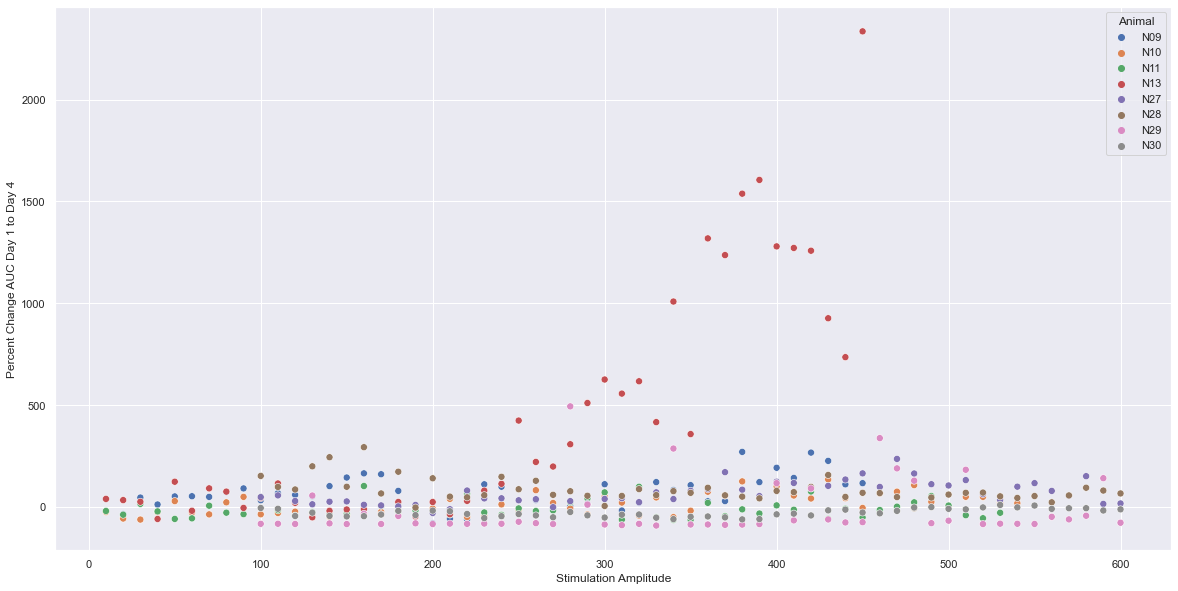

In [399]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1)

ax = sns.scatterplot(x='Stimulation Amplitude', y='Percent Change AUC Day 1 to Day 4', hue='Animal', data=df_inj_stim, s=50)
#ax.set_ylabel('Mean Percent Change STA AUC Day 1 to Day 4')
#plt.savefig('C:\\Users\\iangm\\Downloads\\PLOT.pdf')

# plt.figure(figsize=(20,12))
# sns.set(font_scale=2)
# sns.set_style("ticks")
# ax = sns.boxplot(x='Group', y='Percent_Change', hue='Stim_Amplitude', data=df_auc_pchange[df_auc_pchange['Days'] == day_range])
# ax.legend(loc="upper left", title='Stimulation Amplitude (uA)', title_fontsize="small")
# ax.set_title(project + ': Percent Change AUC ' + day_range)
# ax.set_ylabel('Percent Change STA AUC')

# CODE BELOW THIS NEEDS TO BE INTEGRATED TO CODE ABOVE

###### Below is a plot showing the data we will be working with. Data are normalized and are cut off at 13 ms after the stimulus. Also, only stimulation amplitudes divisible by 50 are in this dataframe.

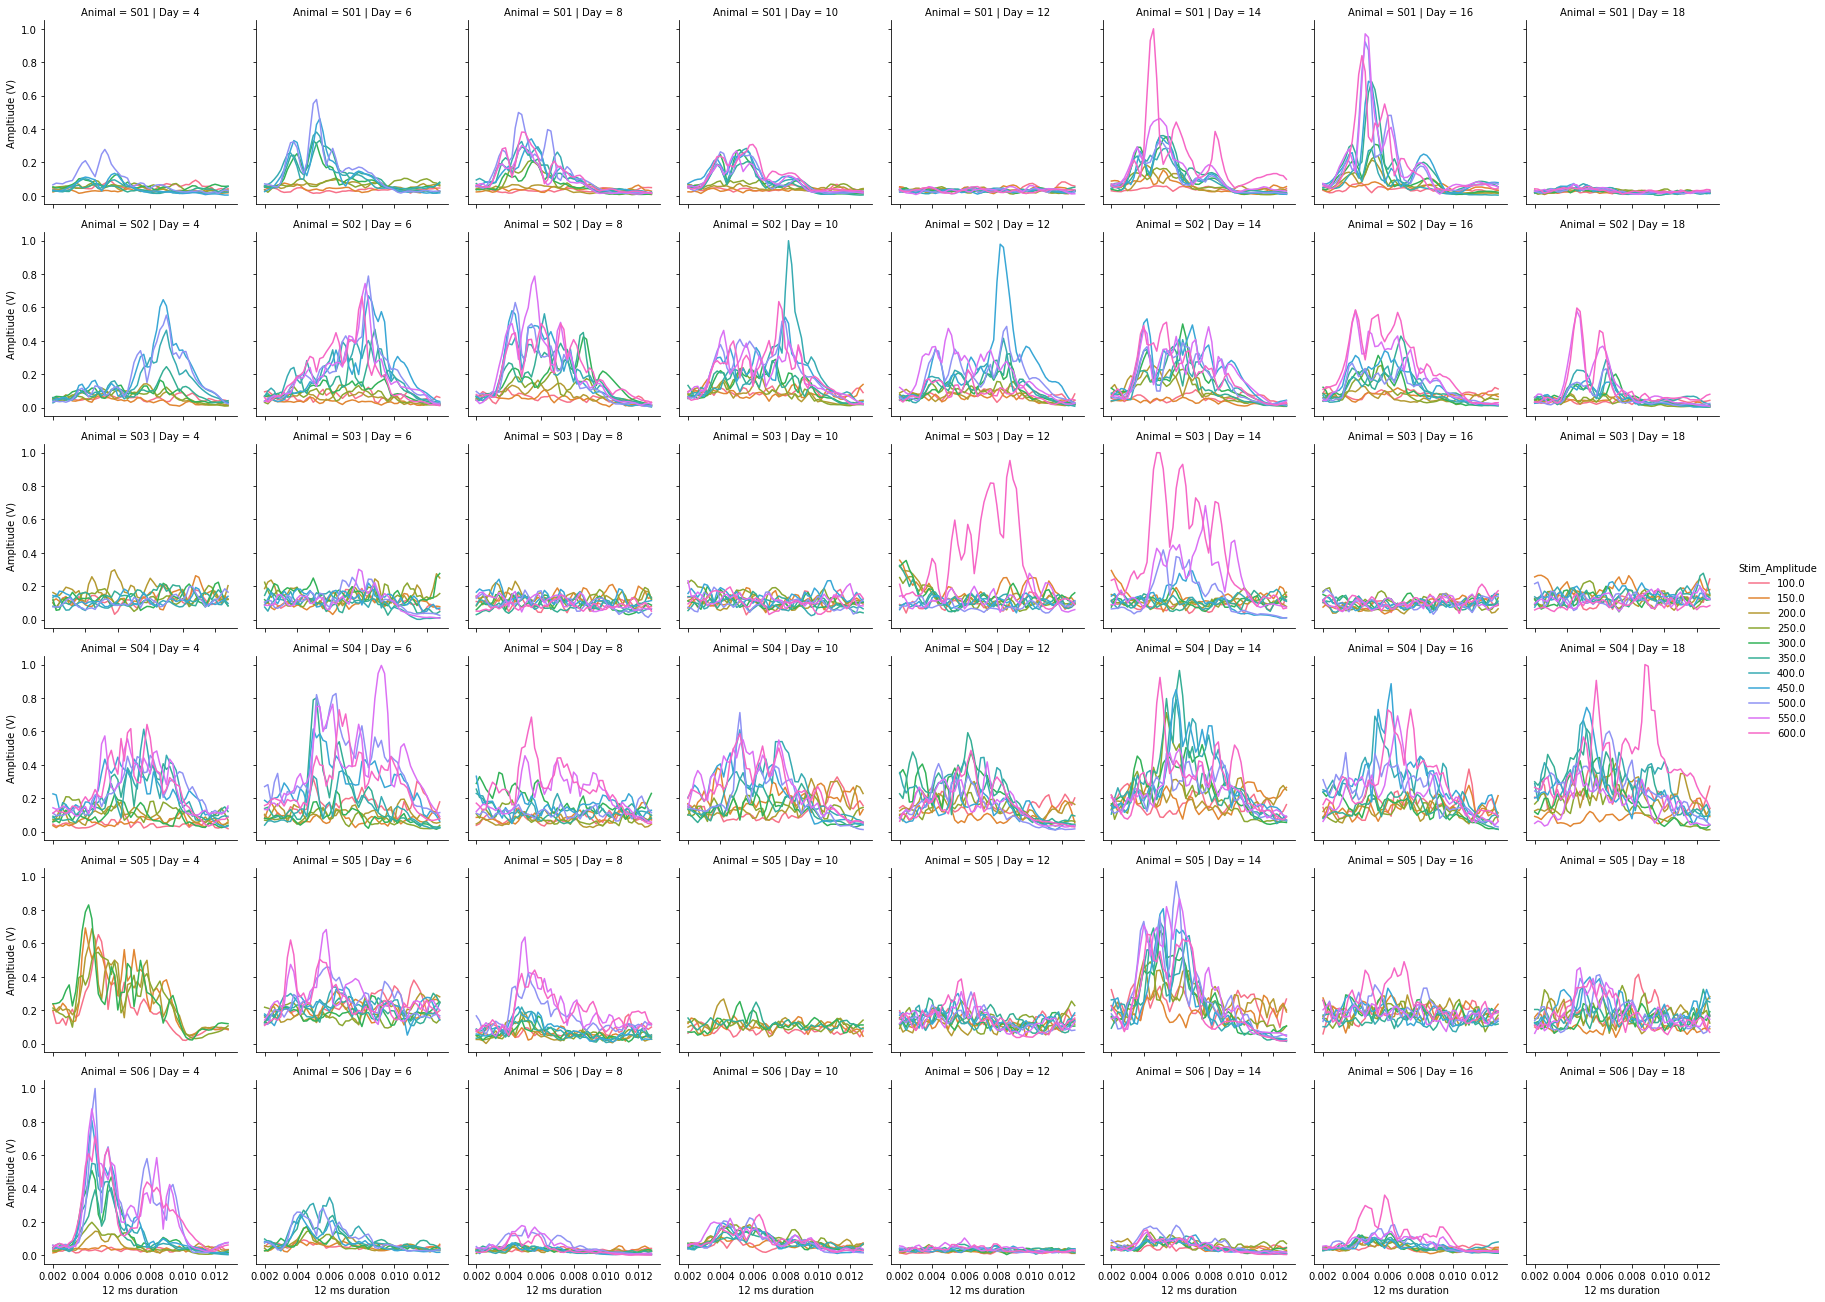

In [14]:
# g = sns.FacetGrid(df_bin, col='Day', row='Animal', hue='Stim_Amplitude')
# g.map_dataframe(sns.lineplot, x='Time', y='STA_Scaled')
# g.set_axis_labels('12 ms duration', 'Ampltiude (V)')
# g.add_legend()

We now need to integrate the stimulus triggered average curves to find the area beneath them. We can then compare these areas under the curve (AUCs) between groups, days, stimulus intensities, etc.

The trapezoidal rule provides a simple way to integrate a function but typically has much larger error than Simpson's rule without saving significant compute time. We will use Simpson's rule.

In [182]:
from scipy import integrate

df_auc = df_bin.groupby(['Animal', 'Day', 'Side', 'Stim_Amplitude', 'Bin'])['STA_Scaled'].apply(integrate.simps).reset_index()
df_auc.rename(columns = {'STA_Scaled':'STA_AUC'}, inplace = True)
df_auc = df_auc.dropna()
df_auc.head()

,Animal,Day,Side,Stim_Amplitude,Bin,STA_AUC
0,S01,4,Right,100.0,1 to 4 ms,0.419022
1,S01,4,Right,100.0,4 to 7 ms,0.832242
2,S01,4,Right,100.0,7 to 10 ms,0.780677
3,S01,4,Right,100.0,10 to 13 ms,0.807257
5,S01,4,Right,150.0,1 to 4 ms,0.280608


### Rough work below

In [184]:
import numpy as np

# add animal group information to the dataframe
conditions = [
    (df_auc['Animal'] == 'S01') | (df_auc['Animal'] == 'S02'),
    (df_auc['Animal'] == 'S03') | (df_auc['Animal'] == 'S04'),
    (df_auc['Animal'] == 'S05') | (df_auc['Animal'] == 'S06')]
choices = ['Group A', 'Group B', 'Group C']
df_auc['Group'] = np.select(conditions, choices)
df_auc.head()

,Animal,Day,Side,Stim_Amplitude,Bin,STA_AUC,Group
0,S01,4,Right,100.0,1 to 4 ms,0.419022,Group A
1,S01,4,Right,100.0,4 to 7 ms,0.832242,Group A
2,S01,4,Right,100.0,7 to 10 ms,0.780677,Group A
3,S01,4,Right,100.0,10 to 13 ms,0.807257,Group A
5,S01,4,Right,150.0,1 to 4 ms,0.280608,Group A


In [298]:
# function to calculate percent change
def perc_change_from_d4(df, day):
    return ((df[str(day)].sub(df['4'])).div(df['4'])).mul(100)

In [203]:
### changed function above to take df arg

df_auc_pchange = df_auc.pivot_table(index=['Animal', 'Side', 'Stim_Amplitude', 'Bin', 'Group'], 
                    columns='Day', 
                    values='STA_AUC').reset_index()

for n in np.arange(6,20,2):
    df_auc_pchange["Day 4 to Day %s" % n] = perc_change_from_d4(n)

df_auc_pchange = df_auc_pchange.drop(df_auc_pchange.columns[5:13], axis=1)
df_auc_pchange.head()

Day,Animal,Side,Stim_Amplitude,Bin,Group,Day 4 to Day 6,Day 4 to Day 8,Day 4 to Day 10,Day 4 to Day 12,Day 4 to Day 14,Day 4 to Day 16,Day 4 to Day 18
0,S01,Right,100.0,1 to 4 ms,Group A,-27.492595,-23.789535,-3.985187,-32.249709,-34.897991,-34.450146,-54.934389
1,S01,Right,100.0,4 to 7 ms,Group A,-55.335661,-53.457297,-40.075066,-34.298249,-16.685615,-19.420758,-60.140322
2,S01,Right,100.0,7 to 10 ms,Group A,-37.073048,-38.489385,-23.351924,-35.834801,-28.431806,-44.579683,-53.460703
3,S01,Right,100.0,10 to 13 ms,Group A,-37.266530,-39.663738,-27.217070,0.151266,-38.419893,-51.832248,-56.675109
4,S01,Right,150.0,1 to 4 ms,Group A,102.909225,-4.090707,-5.039629,29.685401,158.800671,65.079660,-41.981925


In [208]:
df_auc_pchange = pd.melt(df_auc_pchange, id_vars=['Animal', 'Side', 'Stim_Amplitude', 'Bin', 'Group'], var_name='Days', value_name='Percent_Change')
df_auc_pchange.head()

,Animal,Side,Stim_Amplitude,Bin,Group,Days,Percent_Change
0,S01,Right,100.0,1 to 4 ms,Group A,Day 4 to Day 6,-27.492595
1,S01,Right,100.0,4 to 7 ms,Group A,Day 4 to Day 6,-55.335661
2,S01,Right,100.0,7 to 10 ms,Group A,Day 4 to Day 6,-37.073048
3,S01,Right,100.0,10 to 13 ms,Group A,Day 4 to Day 6,-37.266530
4,S01,Right,150.0,1 to 4 ms,Group A,Day 4 to Day 6,102.909225


In [271]:
df_auc_pchange[(df_auc_pchange['Group'] == 'Group C') & (df_auc_pchange['Days'] == 'Day 4 to Day 16') & (df_auc_pchange['Animal'] == 'S05')].head(50)

,Animal,Side,Stim_Amplitude,Bin,Group,Days,Percent_Change
1496,S05,Right,100.0,1 to 4 ms,Group C,Day 4 to Day 16,18.455456
1497,S05,Right,100.0,4 to 7 ms,Group C,Day 4 to Day 16,-56.779948
1498,S05,Right,100.0,7 to 10 ms,Group C,Day 4 to Day 16,24.986994
1499,S05,Right,100.0,10 to 13 ms,Group C,Day 4 to Day 16,173.498386
1500,S05,Right,150.0,1 to 4 ms,Group C,Day 4 to Day 16,-18.284108
1501,S05,Right,150.0,4 to 7 ms,Group C,Day 4 to Day 16,-51.692749
1502,S05,Right,150.0,7 to 10 ms,Group C,Day 4 to Day 16,-41.891742
1503,S05,Right,150.0,10 to 13 ms,Group C,Day 4 to Day 16,141.762349
1504,S05,Right,200.0,1 to 4 ms,Group C,Day 4 to Day 16,-15.642828
1505,S05,Right,200.0,4 to 7 ms,Group C,Day 4 to Day 16,-50.780332


C:\Users\Ian\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Ian\anaconda3\lib\site-packages\seaborn\axisgrid.py:650: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


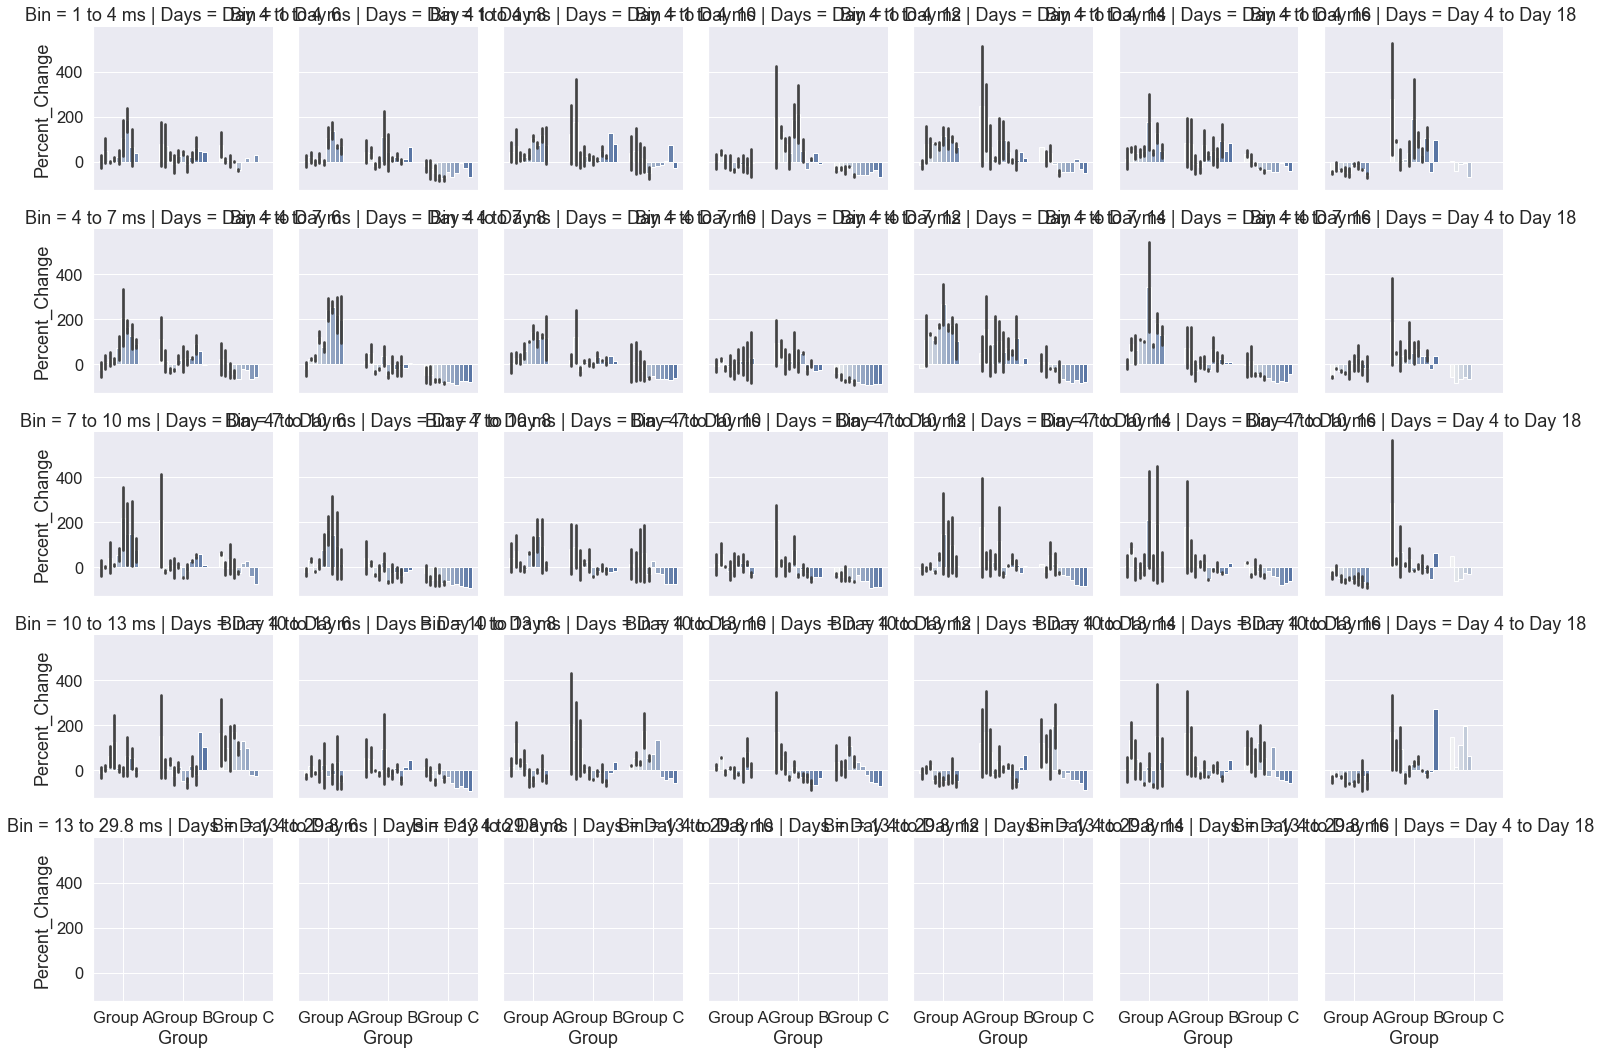

In [261]:
# all the bar plots
sns.set(font_scale=1.5)
g = sns.FacetGrid(df_auc_pchange, col="Days", row='Bin')
g.map(sns.barplot, "Group", "Percent_Change", 'Stim_Amplitude')

Text(0, 0.5, 'Percent Change STA AUC')

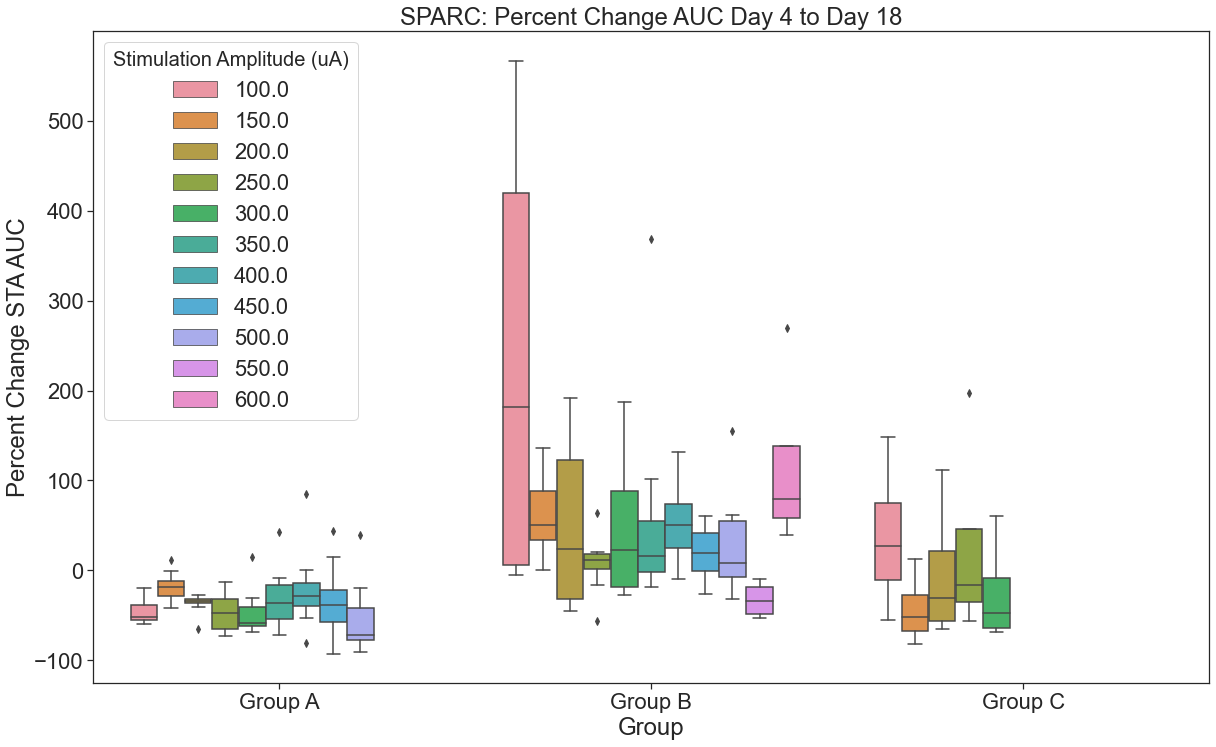

In [258]:
day_range = 'Day 4 to Day 18'

plt.figure(figsize=(20,12))
sns.set(font_scale=2)
sns.set_style("ticks")
ax = sns.boxplot(x='Group', y='Percent_Change', hue='Stim_Amplitude', data=df_auc_pchange[df_auc_pchange['Days'] == day_range])
ax.legend(loc="upper left", title='Stimulation Amplitude (uA)', title_fontsize="small")
ax.set_title(project + ': Percent Change AUC ' + day_range)
ax.set_ylabel('Percent Change STA AUC')

### Other analyses

- Peak to peak from stimulus triggered average for each current amplitude, each animal, each day
- Latency from stimulus pulse to stimulus triggered average for each current amplitude, each animal, each day
- Time domains of stimulus triggered average
- Differences in any of these parameters based on time of day?
- How are we going to present the impedance data in the Neilsen paper? I’m still not clear on this.
- Additional things we can look at (e.g., wavelet, FFT, HMM, etc.)
- Look in manuscript file for notes on ideas. Also look in Daily Notes on OneNote for papers that did EMG analysis well.
- Add information on time of day and stimulus amplitude from Neurochip